In [ ]:
import numpy as np
import pandas as pd # Reading the dataset file
import matplotlib.pyplot as plt
import seaborn as sns

In [351]:
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
# Some reporting tools and functions
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import silhouette_score
from matplotlib import colors as mcolors
from sklearn.decomposition import PCA

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
dataset = pd.read_csv('diabetic_data.csv')

In [ ]:
dataset = dataset.replace('?', np.nan)

In [ ]:
dataset.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


<Axes: ylabel='readmitted'>

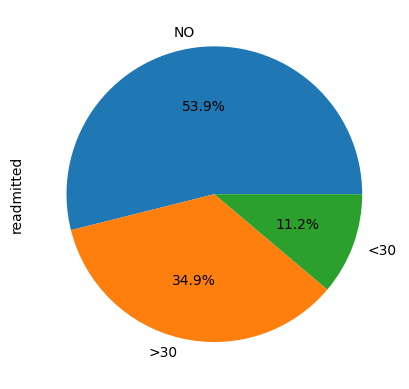

In [ ]:
# Drawing pie chart of the final column in the dataset in percentage
counts = dataset['readmitted'].value_counts()
count_percent = counts * 100 / len(dataset)
count_percent.plot(kind='pie', autopct='%1.1f%%')

In [ ]:
# Showing the number of NULL values in each column or attribute

dataset.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [ ]:
# Showing the percentage of NULL values in each column or attribute

condition = dataset.isnull().sum()>1
dataset.isnull().sum()[condition]/len(dataset)*100

race                  2.233555
weight               96.858479
payer_code           39.557416
medical_specialty    49.082208
diag_1                0.020636
diag_2                0.351787
diag_3                1.398306
dtype: float64

In [ ]:
# Deleting attributes with the most percentage of NULL values ---> weight, payer_code, medical_specialty
null_columns = ['weight','payer_code','medical_specialty']
dataset.drop(null_columns, axis=1, inplace=True)

<Axes: ylabel='readmitted'>

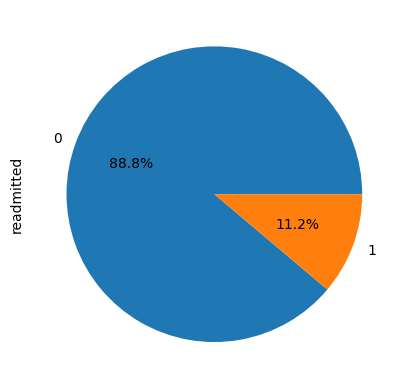

In [ ]:
#  Reduce "readmitted" values to two values : 1) 'NO' and '>30' ---> 0     2) '<30' ---> 1

dataset = dataset.replace({"NO":0, "<30":1, ">30":0})

counts2 = dataset['readmitted'].value_counts()
count2_percent = counts2 * 100 / len(dataset)
count2_percent.plot(kind='pie', autopct='%1.1f%%')

In [ ]:
dataset.race.value_counts(normalize = True)*100

Caucasian          76.486788
AfricanAmerican    19.307891
Hispanic            2.047380
Other               1.513674
Asian               0.644266
Name: race, dtype: float64

<Axes: xlabel='race', ylabel='count'>

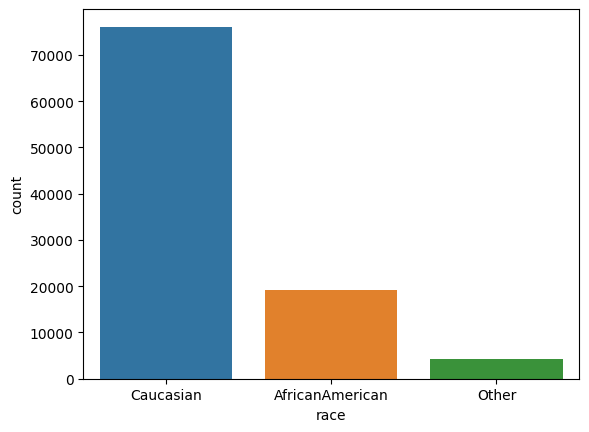

In [ ]:
# Editing the labels of "race" column based on the percentages 
# {"Hispanic", "Other", "Asian"} ---> "Other"

changes_dict = {"Asian":"Other", "Hispanic":"Other"}
dataset.race = dataset.race.replace(changes_dict)

sns.countplot(x="race", data = dataset)

In [ ]:
dataset.gender.value_counts(normalize = True)

Female             0.537586
Male               0.462384
Unknown/Invalid    0.000029
Name: gender, dtype: float64

<Axes: xlabel='gender', ylabel='count'>

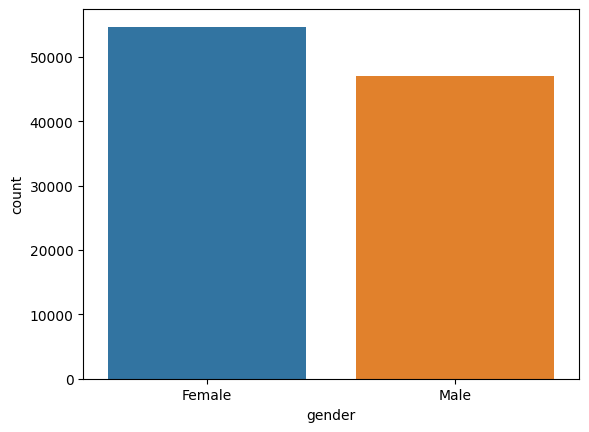

In [ ]:
# Delete rows with gender=="Unknown/Invalid"

dataset = dataset.drop(dataset.loc[dataset["gender"]=="Unknown/Invalid"].index, axis=0)
sns.countplot(x = "gender", data = dataset)

In [ ]:
dataset.age.value_counts(normalize = True)*100

[70-80)     25.614418
[60-70)     22.092509
[50-60)     16.957047
[80-90)     16.899069
[40-50)      9.517212
[30-40)      3.709600
[90-100)     2.744612
[20-30)      1.628293
[10-20)      0.679029
[0-10)       0.158211
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='count'>

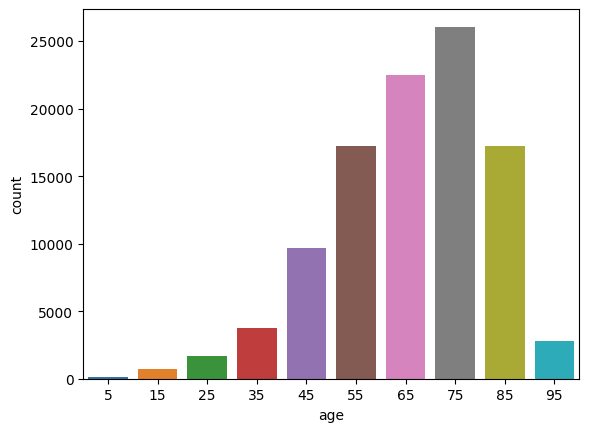

In [ ]:
# Replace each value of attriubute age by the middle numbers

dataset.age = dataset.age.replace({"[70-80)":75,
                         "[60-70)":65,
                         "[50-60)":55,
                         "[80-90)":85,
                         "[40-50)":45,
                         "[30-40)":35,
                         "[90-100)":95,
                         "[20-30)":25,
                         "[10-20)":15,
                         "[0-10)":5})

sns.countplot(x="age", data=dataset)

In [ ]:
# Emergency : 1
# Urgent : 2
# Elective : 3
# Newborn : 4
# Not Available : 5
# NULL : 6
# Trauma Center : 7
# Not Mapped : 8

dataset.admission_type_id.value_counts()

1    53988
3    18868
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64

In [ ]:
plan = {1.0:"Emergency",
          2.0:"Emergency",
          3.0:"Elective",
          4.0:"Newborn",
          5.0:np.nan,
          6.0:np.nan,
          7.0:"Trauma Center",
          8.0:np.nan}

dataset.admission_type_id = dataset.admission_type_id.replace(plan)
dataset.admission_type_id.value_counts()

Emergency        72468
Elective         18868
Trauma Center       21
Newborn             10
Name: admission_type_id, dtype: int64

In [ ]:
mapping_home = {1:"Discharged to Home",
                    6:"Discharged to Home",
                    8:"Discharged to Home",
                    13:"Discharged to Home",
                    19:"Discharged to Home",
                    18:np.nan,25:np.nan,26:np.nan,
                    2:"Other",3:"Other",4:"Other",
                    5:"Other",7:"Other",9:"Other",
                    10:"Other",11:"Other",12:"Other",
                    14:"Other",15:"Other",16:"Other",
                    17:"Other",20:"Other",21:"Other",
                    22:"Other",23:"Other",24:"Other",
                    27:"Other",28:"Other",29:"Other",30:"Other"}

dataset.discharge_disposition_id = dataset.discharge_disposition_id.replace(mapping_home)                    

In [ ]:
mapping_adm = {1:"Referral",2:"Referral",3:"Referral",
              4:"Other",5:"Other",6:"Other",10:"Other",22:"Other",25:"Other",
              9:"Other",8:"Other",14:"Other",13:"Other",11:"Other",
              15:np.nan,17:np.nan,20:np.nan,21:np.nan,
              7:"Emergency"}

dataset.admission_source_id = dataset.admission_source_id.replace(mapping_adm)

In [ ]:
def map_diagnosis(data, cols):
  for col in cols:
        data.loc[(data[col].str.contains("V")) | (data[col].str.contains("E")), col] = -1
        data[col] = data[col].astype(np.float16)
  for col in cols:
        data["temp_diag"] = np.nan
        data.loc[(data[col]>=390) & (data[col]<=459) | (data[col]==785), "temp_diag"] = "Circulatory"
        data.loc[(data[col]>=460) & (data[col]<=519) | (data[col]==786), "temp_diag"] = "Respiratory"
        data.loc[(data[col]>=520) & (data[col]<=579) | (data[col]==787), "temp_diag"] = "Digestive"
        data.loc[(data[col]>=250) & (data[col]<251), "temp_diag"] = "Diabetes"
        data.loc[(data[col]>=800) & (data[col]<=999), "temp_diag"] = "Injury"
        data.loc[(data[col]>=710) & (data[col]<=739), "temp_diag"] = "Muscoloskeletal"
        data.loc[(data[col]>=580) & (data[col]<=629) | (data[col] == 788), "temp_diag"] = "Genitourinary"
        data.loc[(data[col]>=140) & (data[col]<=239), "temp_diag"] = "Neoplasms"

        data["temp_diag"] = data["temp_diag"].fillna("Other")
        data[col] = data["temp_diag"]
        data = data.drop("temp_diag", axis=1)

  return data

In [ ]:
dataset = map_diagnosis(dataset,["diag_1","diag_2","diag_3"])

In [ ]:
dataset.change = dataset.change.replace("Ch","Yes")

In [ ]:
dataset["max_glu_serum"] = dataset["max_glu_serum"].replace({">200":2, ">300":2, "Norm":1, "None":0}) 
dataset.max_glu_serum.value_counts()

0    96417
2     2749
1     2597
Name: max_glu_serum, dtype: int64

In [ ]:
dataset["A1Cresult"] = dataset["A1Cresult"].replace({">7":2, ">8":2, "Norm":1, "None":0})
dataset.A1Cresult.value_counts()

0    84745
2    12028
1     4990
Name: A1Cresult, dtype: int64

In [ ]:
dataset.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2271
gender                          0
age                             0
admission_type_id           10396
discharge_disposition_id     4680
admission_source_id          6942
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide   

In [ ]:
dataset

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,5,NaN,NaN,Referral,1,41,...,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,15,Emergency,Discharged to Home,Emergency,3,59,...,No,Up,No,No,No,No,No,Yes,Yes,0
2,64410,86047875,AfricanAmerican,Female,25,Emergency,Discharged to Home,Emergency,2,11,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,35,Emergency,Discharged to Home,Emergency,2,44,...,No,Up,No,No,No,No,No,Yes,Yes,0
4,16680,42519267,Caucasian,Male,45,Emergency,Discharged to Home,Emergency,1,51,...,No,Steady,No,No,No,No,No,Yes,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,75,Emergency,Other,Emergency,3,51,...,No,Down,No,No,No,No,No,Yes,Yes,0
101762,443847782,74694222,AfricanAmerican,Female,85,Emergency,Other,Other,5,33,...,No,Steady,No,No,No,No,No,No,Yes,0
101763,443854148,41088789,Caucasian,Male,75,Emergency,Discharged to Home,Emergency,1,53,...,No,Down,No,No,No,No,No,Yes,Yes,0
101764,443857166,31693671,Caucasian,Female,85,Emergency,Other,Emergency,10,45,...,No,Up,No,No,No,No,No,Yes,Yes,0


In [ ]:
dataset['race'] = dataset['race'].fillna(dataset['race'].mode()[0])
dataset['admission_type_id'] = dataset['admission_type_id'].fillna(dataset['admission_type_id'].mode()[0])
dataset['discharge_disposition_id'] = dataset['discharge_disposition_id'].fillna(dataset['discharge_disposition_id'].mode()[0])
dataset['admission_source_id'] = dataset['admission_source_id'].fillna(dataset['admission_source_id'].mode()[0])

In [ ]:
categorical_data = dataset.select_dtypes('O')
numerical_data = dataset.select_dtypes(np.number)

In [ ]:
labels = LabelEncoder()
for i in categorical_data:
  categorical_data[i] = labels.fit_transform(categorical_data[i])

In [ ]:
dataset = pd.concat([numerical_data,categorical_data], axis=1)

In [ ]:
dataset.drop(['encounter_id','patient_nbr'],axis=1,inplace=True)

In [ ]:
X = dataset.drop('readmitted',axis=1)
y = dataset['readmitted']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=1)

In [ ]:
minmax = MinMaxScaler()
X_train_scaled = pd.DataFrame(minmax.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(minmax.fit_transform(X_test), columns=X_test.columns)

In [ ]:
logestic_reg = LogisticRegression(max_iter=13000)
logestic_reg.fit(X_train_scaled,y_train)
logestic_reg.score(X_train_scaled,y_train)

0.8884218111938506

In [ ]:
logestic_reg.score(X_test_scaled,y_test)

0.8835609708165472

In [ ]:
random_for = RandomForestClassifier()
random_for.fit(X_train_scaled,y_train)
random_for.score(X_train_scaled,y_train)

0.9999344878038128

In [ ]:
random_for.score(X_test_scaled,y_test)

0.8869018374766631

In [ ]:
y_pred = random_for.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[8547,  484],
       [1052,   94]])

In [ ]:
accuracy_score(y_test,y_pred)

0.849071435590056

In [ ]:
correlation = dataset.corr().abs()
readmitted_corr = correlation['readmitted']
delete_list=[] # drop columns list
for col in X.columns:
    if readmitted_corr[col] < 0.035:
        delete_list.append(col)

dataset.drop(columns=delete_list,inplace=True,axis=1)        

In [ ]:
pca = PCA(n_components=2)
dataset_pca = pca.fit_transform(dataset)
new_dataset = pd.DataFrame(data = dataset_pca, columns = ['x', 'y'] )

<Figure size 640x480 with 0 Axes>

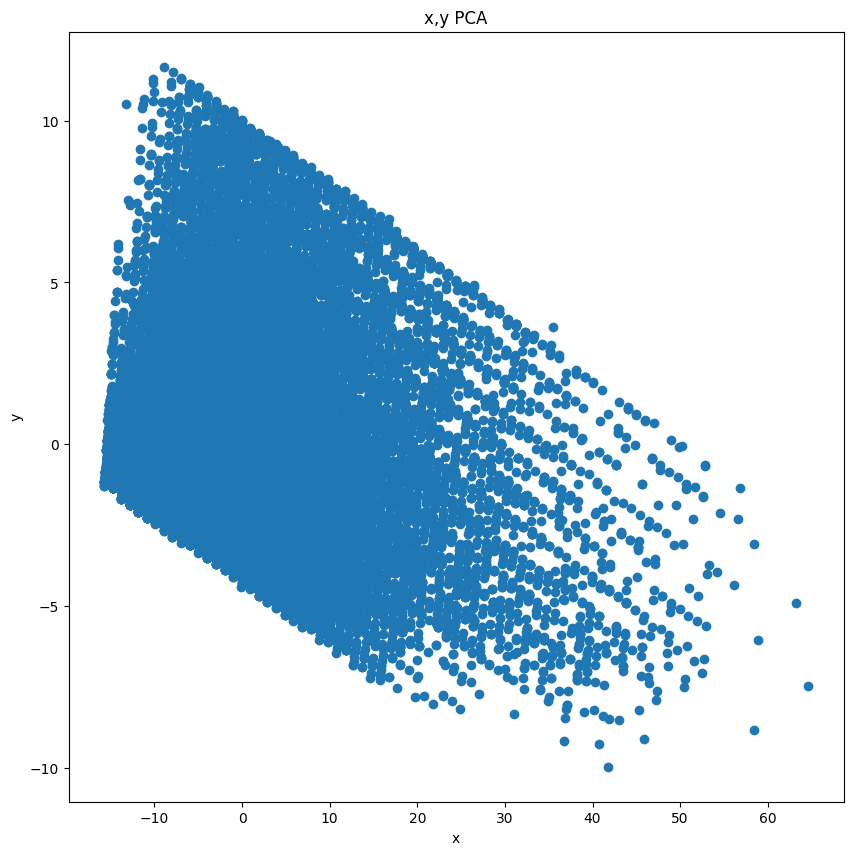

In [ ]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('x')
plt.ylabel('y')
plt.title('x,y PCA')
plt.scatter(new_dataset['x'], new_dataset['y'])

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 1)
predicted_y = kmeans.fit_predict(dataset_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


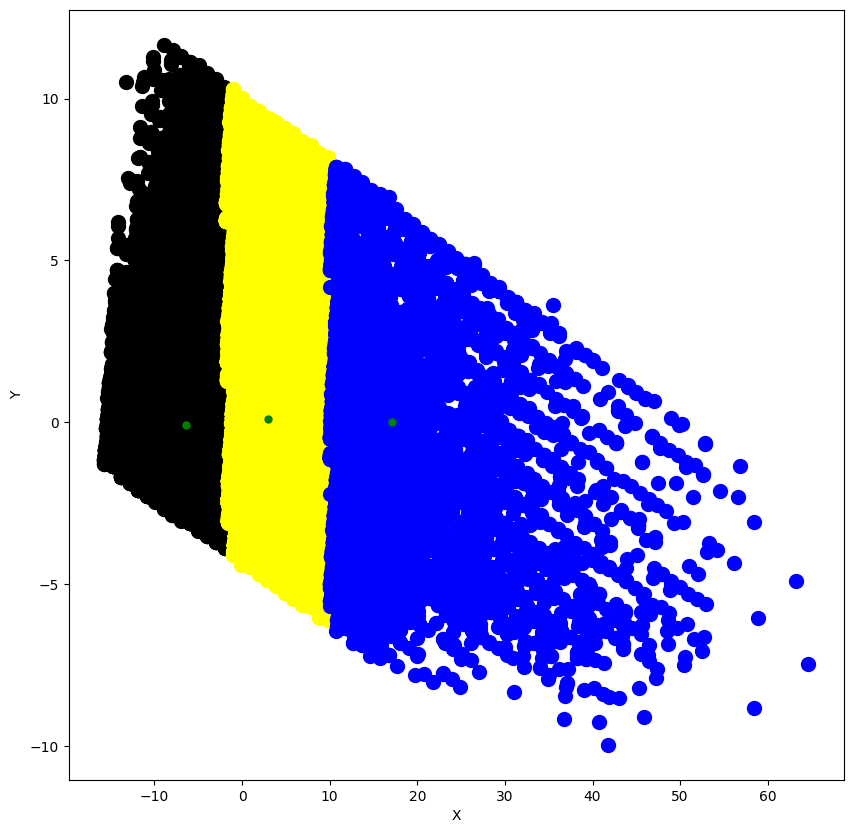

In [ ]:
principalComponents1=dataset_pca
plt.figure(figsize=(10,10))
plt.scatter(principalComponents1[predicted_y == 0, 0], principalComponents1[predicted_y == 0, 1], s = 100, c = 'black', label = 'Cluster 1')
plt.scatter(principalComponents1[predicted_y == 1, 0], principalComponents1[predicted_y == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(principalComponents1[predicted_y == 2, 0], principalComponents1[predicted_y == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 25, c = 'green', label = 'Centroids')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
silhouette = silhouette_score(X, predicted_y)
print("silhouette: ", silhouette)
print("inertia: ", kmeans.inertia_)


silhouette :  0.032605496914864494
inertia:  2183944.6214516554
